# Problem Set 1: Analysis of racial disparities in felony sentencing

# 0. Load packages and imports

In [8]:
## basic functionality
import pandas as pd
import numpy as np
import re

## can add others if you need them

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## 0.1: Load the data (0 points)

Load the `sentencing_asof0405.csv` data

*Notes*: You may receive a warning about mixed data types upon import; feel free to ignore

In [10]:
df = pd.read_csv('/Users/pwax/Desktop/QSS 20/pset1_inputdata/sentencing_asof0405.csv')

/var/folders/9_/fcykl83s1dncqz69y6vx8b6w0000gn/T/ipykernel_30050/3780667190.py:1: DtypeWarning: Columns (10,11,14,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/pwax/Desktop/QSS 20/pset1_inputdata/sentencing_asof0405.csv')


## 0.2: Print head, dimensions, info (0 points)

In [12]:
df.head() 
print(df.shape)
df.info()

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
0,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510112469,116304211997,FIRST DEGREE MURDER,2,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
1,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510213021,98265074680,HOME INVASION,14,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
2,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516447217,131972895911,FIRST DEGREE MURDER,4,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
3,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516497493,131966356472,FIRST DEGREE MURDER,5,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
4,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516648320,98059642859,HOME INVASION,13,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide


(248146, 41)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248146 entries, 0 to 248145
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   CASE_ID                            248146 non-null  int64  
 1   CASE_PARTICIPANT_ID                248146 non-null  int64  
 2   RECEIVED_DATE                      248146 non-null  object 
 3   OFFENSE_CATEGORY                   248146 non-null  object 
 4   PRIMARY_CHARGE_FLAG                248146 non-null  bool   
 5   CHARGE_ID                          248146 non-null  int64  
 6   CHARGE_VERSION_ID                  248146 non-null  int64  
 7   DISPOSITION_CHARGED_OFFENSE_TITLE  248146 non-null  object 
 8   CHARGE_COUNT                       248146 non-null  int64  
 9   DISPOSITION_DATE                   248146 non-null  object 
 10  DISPOSITION_CHARGED_CHAPTER        248146 non-null  object 
 11  DISPOSITION_CHARGED_ACT   

# Part one: data cleaning/interpretation

## 1.1: Understanding the unit of analysis (5 points)

- Print the number of unique values for the following columns. Do so in a way that avoids copying/pasting code for 
the three:

    - Cases (`CASE_ID`)
    - People in that case (`CASE_PARTICIPANT_ID`)
    - Charges (`CHARGE_ID`)

- Write a couple sentences on the following and show an example of each (e.g., a case involving multiple people):
    
    - Why there are more unique people than unique cases?
    - Why there are more unique charges than unique people?

- Print the mean and median number of charges per case/participant 

- Print the mean and median number of participants per case

- Does the data seem to enable us to follow the same defendant across different cases they're charged in? Write 1 sentence in support of your conclusion.


In [15]:
df[["CASE_ID","CASE_PARTICIPANT_ID","CHARGE_ID"]].nunique()

CASE_ID                197519
CASE_PARTICIPANT_ID    211977
CHARGE_ID              229015
dtype: int64

There are more unique people than cases because some cases can involve multiple people, for example a robbery from a gang of 4 people would only be one case but would have 4 case participants

There are more charges than unique people as some of the people will have comitted multiple charges. For example a certain person can be involved in 2 different cases which means for an addition of 2 cases there will be only one unique person.

In [18]:
charges_per_person = df.groupby("CASE_PARTICIPANT_ID")["CHARGE_ID"].nunique()
charges_per_person.mean(), charges_per_person.median()

(1.1261457610967227, 1.0)

In [19]:
participants_per_case= df.groupby("CASE_ID")["CASE_PARTICIPANT_ID"].nunique()
participants_per_case.mean(), participants_per_case.median()

(1.0731980214561636, 1.0)

Yes it does, since the number of cases is more than the number of case_participants it shows that the case participant ID is not unique to the case; this means we can track defendants across cases through their CASE_PARTICIPANT_ID number.

## 1.2.1: Which offense is final? (3 points)

- First, read the data documentation [link](https://datacatalog.cookcountyil.gov/api/views/tg8v-tm6u/files/8597cdda-f7e1-44d1-b0ce-0a4e43f8c980?download=true&filename=CCSAO%20Data%20Glossary.pdf) and summarize in your own words the differences between `OFFENSE_CATEGORY` and `UPDATED_OFFENSE_CATEGORY` 

- Construct an indicator `is_changed_offense` that's True for case-participant-charge observations (rows) where there's a difference between the original charge (offense category) and the most current charge (updated offense category). What are some of the more common changed offenses? (can just print result of sort_values based on original offense category)

- Print one example of a changed offense from one of these categories and comment on what the reason may be


The OFFENSE_CATEGORY is the offense that the defendant is originally charged with, the UPDATED_OFFENSE_CATEGORY is the updated offense that they are charged with which can change as a case evolves.

In [23]:
df["is_changed_offense"] = df["OFFENSE_CATEGORY"] != df["UPDATED_OFFENSE_CATEGORY"]

In [24]:
common_changes = df[df["is_changed_offense"]==True]["OFFENSE_CATEGORY"].value_counts().reset_index()
common_changes

,OFFENSE_CATEGORY,count
0,PROMIS Conversion,6394
1,DUI,3896
2,UUW - Unlawful Use of Weapon,2155
3,Other Offense,2125
4,Aggravated Battery,1927
...,...,...
83,Perjury,4
84,Prostitution,3
85,Compelling Gang Membership,2
86,Benefit Recipient Fraud,2


In [25]:
example = df[(df["is_changed_offense"]) & (df["OFFENSE_CATEGORY"] == "DUI")].head(1)

print(example[["CASE_ID", "CASE_PARTICIPANT_ID", "CHARGE_ID", 
               "OFFENSE_CATEGORY", "UPDATED_OFFENSE_CATEGORY"]])


            CASE_ID  CASE_PARTICIPANT_ID     CHARGE_ID OFFENSE_CATEGORY  \
11021  377427814448         695176993911  335034309383              DUI   

      UPDATED_OFFENSE_CATEGORY  
11021           Aggravated DUI  


The charge was upgraded from DUI to aggravated DUI, it could have happened for a number of reasons including extremely high blood alcohol level or driving without a liscence.

## 1.2.2: Simplifying the charges (5 points)

Using the field (`UPDATED_OFFENSE_CATEGORY`), create a new field, `simplified_offense_derived`, that simplifies the many offense categories into broader buckets using the following process:

First, combine all offenses beginning with "Aggravated" into a single category without that prefix (e.g., Aggravated Battery and Battery just becomes Battery)

Then:
- Combine all offenses with arson into a single arson category (`Arson`)
- Combine all offenses with homicide into a single homicide category (`Homicide`)
- Combine all offenses with vehicle/vehicular in the name into a single vehicle category (`Vehicle-related`)
- Combine all offenses with battery in the name into a single battery category (`Battery`)

Try to do so efficiently (e.g., using map and a dictionary or np.select rather than separate line for each recoded offense)

Print the difference between the # of unique offenses in the original `UPDATED_OFFENSE_CATEGORY` field and the # of unique offenses in your new `simplified_offense_derived` field


In [28]:
offense_clean = df["UPDATED_OFFENSE_CATEGORY"].str.replace("Aggravated ", "")

conditions = [
    offense_clean.str.contains("arson"),
    offense_clean.str.contains("homicide"),
    offense_clean.str.contains("vehicle|vehicular"),
    offense_clean.str.contains("battery")
]

choices = ["Arson", "Homicide", "Vehicle-related", "Battery"]

df["simplified_offense_derived"] = np.select(
    conditions,
    choices,
    default=offense_clean
)
original_unique = df["UPDATED_OFFENSE_CATEGORY"].nunique()
simplified_unique = df["simplified_offense_derived"].nunique()
print(original_unique, simplified_unique, original_unique - simplified_unique)


79 75 4


## 1.3: Cleaning additional variables (10 points)

Clean the following variables; make sure to retain the original variable in data and use the derived suffix so it's easier to pull these cleaned out variables later (e.g., `age_derived`) to indicate this was a transformation

- Race: create True/false indicators for `is_black_derived` (Black only or mixed race with hispanic), Non-Black Hispanic, so either hispanic alone or white hispanic (`is_hisp_derived`), White non-hispanic (`is_white_derived`), or none of the above (`is_othereth_derived`)

- Gender: create a boolean true/false indicator for `is_male_derived` (false is female, unknown, or other)

- Age at incident: you notice outliers like 130-year olds. Winsorsize the top 0.01% of values to be equal to the 99.99th percentile value pre-winsorization. Call this `age_derived`

- Create `sentenceymd_derived` that's a version of `SENTENCING_DATE` converted to datetime format. Also create a rounded version, `sentenceym_derived`, that's rounded down to the first of the month and the year (e.g., 01-05-2016 and 01-27-2016 each become 01-01-2016)
    - Hint: all timestamps are midnight so u can strip in conversion. For full credit, before converting, you notice that some of the years have been mistranscribed (e.g., 291X or 221X instead of 201X). Programatically fix those (eg 2914 -> 2014). Even after cleaning, there will still be some that are after the year 2021 that we'll filter out later. For partial credit, you can ignore the timestamps that cause errors and set errors = "coerce" within `pd.to_datetime()` to allow the conversion to proceed. 

- Sentencing judge: create an identifier (`judgeid_derived`) for each unique judge (`SENTENCE_JUDGE`) structured as judge_1, judge_2...., with the order determined by sorting the judges (will sort on fname then last). When finding unique judges, there are various duplicates we could weed out --- for now, just focus on (1) the different iterations of Doug/Douglas Simpson, (2) the different iterations of Shelley Sutker (who appears both with her maiden name and her hyphenated married name). 
     - Hint: due to mixed types, you may need to cast the `SENTENCE_JUDGE` var to a diff type to sort

After finishing, print a random sample of 10 rows (data.sample(n = 10)) with the original and cleaned columns for the relevant variables to validate your work

In [30]:
df["is_black_derived"] = df["RACE"].str.contains("Black", na=False)
df["is_hisp_derived"]  = df["RACE"].str.contains("Hispanic", na=False) & ~df["is_black_derived"]
df["is_white_derived"] = df["RACE"].str.contains("White", na=False) & ~df["is_hisp_derived"] & ~df["is_black_derived"]
df["is_othereth_derived"] = ~(df["is_black_derived"] | df["is_hisp_derived"] | df["is_white_derived"])

In [31]:
df["is_male_derived"] = df["GENDER"].str == "MALE"

In [32]:
age_cap = df["AGE_AT_INCIDENT"].quantile(0.9999)
df["age_derived"] = df["AGE_AT_INCIDENT"].clip(upper=age_cap)

In [33]:
df["SENTENCING_DATE_CLEAN"] = df["SENTENCE_DATE"].astype(str).str.split().str[0]
df["sentenceymd_derived"] = pd.to_datetime(df["SENTENCING_DATE_CLEAN"], errors="coerce")
df.loc[df["sentenceymd_derived"] > pd.Timestamp("2021-12-31"), "sentenceymd_derived"] = pd.NaT
df["sentenceym_derived"] = df["sentenceymd_derived"].dt.to_period("M").dt.to_timestamp()

In [34]:
df["SENTENCE_JUDGE_CLEAN"] = df["SENTENCE_JUDGE"].astype(str)
df["SENTENCE_JUDGE_CLEAN"] = df["SENTENCE_JUDGE_CLEAN"].str.replace(r"Doug(las)? Simpson", "Doug Simpson", case=False, regex=True)
df["SENTENCE_JUDGE_CLEAN"] = df["SENTENCE_JUDGE_CLEAN"].str.replace(r"Shelley Sutker(-Dermer)?", "Shelley Sutker", case=False, regex=True)
unique_judges = sorted(df["SENTENCE_JUDGE_CLEAN"].unique())
judge_map = {name: f"judge_{i+1}" for i, name in enumerate(unique_judges)}
df["judgeid_derived"] = df["SENTENCE_JUDGE_CLEAN"].map(judge_map)

In [35]:
print(df[["SENTENCE_JUDGE", "SENTENCE_JUDGE_CLEAN", "judgeid_derived", "sentenceym_derived", "age_derived", "is_male_derived", "is_black_derived", "is_hisp_derived", "is_white_derived", "is_othereth_derived"]].sample(10))

                SENTENCE_JUDGE    SENTENCE_JUDGE_CLEAN judgeid_derived  \
36101             John T Doody            John T Doody       judge_151   
123035          Carol M Howard          Carol M Howard        judge_32   
128323          Stanley  Sacks          Stanley  Sacks       judge_286   
46410   Rosemary Grant Higgins  Rosemary Grant Higgins       judge_273   
143189         Kevin M Sheehan         Kevin M Sheehan       judge_170   
234788         Michael  Clancy         Michael  Clancy       judge_219   
199393      Alfredo  Maldonado      Alfredo  Maldonado         judge_5   
132023                     NaN                     nan       judge_339   
123649          Neil J Linehan          Neil J Linehan       judge_236   
83655           William G Lacy          William G Lacy       judge_330   

       sentenceym_derived  age_derived  is_male_derived  is_black_derived  \
36101          2011-12-01         49.0            False              True   
123035         2014-04-01      

## 1.4: Subsetting rows to analytic dataset (5 points)

You decide based on the above to simplify things in the following ways:
    
- Subset to cases where only one participant is charged, since cases with >1 participant might have complications like 
plea bargains/informing from other participants affecting the sentencing of the focal participant

- To go from a participant-case level dataset, where each participant is repeated across charges tied to the case, to a participant-level dataset, where each participant has one charge, subset to a participant's primary charge and their current sentence (`PRIMARY_CHARGE_FLAG` is True and `CURRENT_SENTENCE_FLAG` is True). Double check that this worked by confirming there are no longer multiple charges for the same case-participant

- Filter out observations where judge is nan or nonsensical (indicated by is.null or equal to FLOOD)

- Subset to sentencing date between 01-01-2012 and 04-05-2021 (inclusive)

After completing these steps, print the number of rows in the data

In [37]:
one_participant = df[df["CASE_ID"].map(df["CASE_ID"].value_counts()) == 1]
participant_level=one_participant[(one_participant["PRIMARY_CHARGE_FLAG"]==True) & (one_participant["CURRENT_SENTENCE_FLAG"]==True)]
participant_level_check = participant_level.groupby("CASE_PARTICIPANT_ID")["CHARGE_ID"].nunique()
participant_level_check.mean()
participant_level = participant_level[~(participant_level["SENTENCE_JUDGE"].isnull() | (participant_level["SENTENCE_JUDGE"] == "FLOOD"))]
participant_level= participant_level[(participant_level["sentenceymd_derived"]>=pd.to_datetime("2012-01-01"))&(participant_level["sentenceymd_derived"]<=pd.to_datetime("2021-05-04"))]
print(participant_level.shape[0])

1.0

121342


# Part two: investigating Black vs. White sentencing disparities

Now that the data are cleaned, we're going to investigate different types of disparities in sentencing between Black defendants and White defendants. We're focusing on these groups for the purpose of the problem set, but the analysis could be extended to study Hispanic defendants or, in a different jurisdiction, Asian and other minoritized groups.

**Details if interested in digging deeper**: If interested (optional), you can read more technical coverage of how we might (1) measure disparities, and (2) what factors you want to adjust for when deciding whether two defendants are 'similarly situated' but for their race in the following sources:

- [Review of sentencing disparities research](https://www.journals.uchicago.edu/doi/full/10.1086/701505)
- [Discussion of causal model/blinding race at charging stage of the prosecutorial process](https://5harad.com/papers/blind-charging.pdf)
- [Discussion of measuring discrimination in policing that can generalize to the sentencing case](https://www.annualreviews.org/doi/abs/10.1146/annurev-criminol-011518-024731)
- [General discussion of causal challenges in measuring between-group disparities](https://osf.io/preprints/socarxiv/gx4y3/)

**One major caveat**: when investigating whether two similar defendants received different sentences, we're missing one important attribute that influences sentencing: the defendant's criminal history. This influences sentencing both through sentencing guidelines, which can prescribe longer sentences for those who have certain types of prior convictions, and through judicial discretion if judges are more lenient with first-time defendants. The above sources discuss how much we want to "control away" for this prior history, since if we think there are racial biases in which defendants, conditional on *committing* a crime, are arrested and charged, we may not want to adjust for that factor. More discussion [in this article](https://www.themarshallproject.org/2019/12/03/the-growing-racial-disparity-in-prison-time)


## 2.0: (0 points)

First, read in the following dataset (regardless of progress on part one): `sentencing_cleaned.pkl` (if you can't read in the pkl you can read in the .csv format but may need to recast some of the datetime columns)

*Note*: don't worry if there are slight differences in your output from Part One and this dataset/it's not a good use of time to try to reverse engineer Part One answers from this cleaned data.

In [41]:
d2 = pd.read_pickle('/Users/pwax/Desktop/QSS 20/pset1_inputdata/sentencing_cleaned.pkl')

## 2.1: Investigating one type of between-group difference: who reaches the sentencing stage? (5 points)

Tabulate and visualize the proportion of defendants, out of all defendants sentenced in a given month/year, who are Black and who are White (separate proportions)

- Denominator is number of unique cases that month
- Numerator for black defendants is count of is_black_derived
- Numerator for white defendants is count of is_white_derived
- Fraction of each is numerator/denominator

- Print the table
- Create a graph with two lines--- one for Black defendants as fraction of total; another for White defendants. Make sure it includes a legend summarizing which color is for which group, and clean the legend so that it has informative names (e.g., Black or White rather than prop_black or prop_white)
- Use mathematical notation to write out each of the proportions using summation notation in a 1-2 sentence writeup describing trends. What seems to be going on in April and May 2020? 

**Optional challenge**: improve the viz by shading the background of the visualization for months with fewer than 100 cases 

**Optional challenge**: improve the viz by adding a vertical line for 12-01-2016, the month that new State's Attorney Foxx took office 

In [43]:
import matplotlib as plt
d2['RECEIVED_DATE'] = pd.to_datetime(d2['RECEIVED_DATE'], format="%m/%d/%Y %I:%M:%S %p")
d2['RECEIVED_DATE'] = d2['RECEIVED_DATE'].dt.to_period('M')
monthly_counts = pd.DataFrame({
    'total': d2.groupby('RECEIVED_DATE').size(),
    'black': d2[d2['is_black_derived'] == True].groupby('RECEIVED_DATE').size(),
    'white': d2[d2['is_white_derived'] == True].groupby('RECEIVED_DATE').size(),
})
proportion= pd.DataFrame({
    'black': monthly_counts.black / monthly_counts.total,
    'white': monthly_counts.white / monthly_counts.total,
})


In [44]:
proportion

,black,white
RECEIVED_DATE,,
1901-07,1.000000,NaN
1967-04,1.000000,NaN
1979-08,1.000000,NaN
1979-11,1.000000,NaN
1982-08,1.000000,NaN
...,...,...
2020-10,0.573529,0.250000
2020-11,0.642857,0.071429
2020-12,0.318182,0.454545


<Figure size 1000x700 with 0 Axes>

(12418.0, 18630.0)

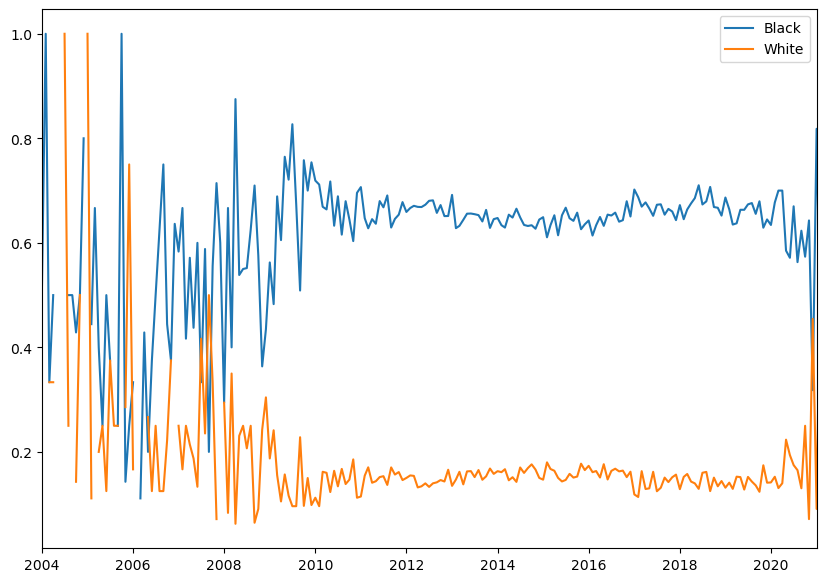

In [45]:
import matplotlib.pyplot as plt
x_dates = monthly_counts.index.to_timestamp()

plt.figure(figsize=(10,7))
plt.plot(x_dates,(proportion.black), label="Black")
plt.plot(x_dates,(proportion.white), label="White")
plt.xlim(pd.Timestamp('2004-01-01'),pd.Timestamp('2021-01-03'))
plt.legend()

### Proportion formulas using summation notation

For each month $ t $, the proportions of Black and White individuals are calculated as:

$
P_{Black, t} = \frac{\sum_{i \in t} \text{is\_black\_derived == True}_i}{\sum_{i \in t} 1}
$

$
P_{White, t} =\frac{\sum_{i \in t} \text{is\_white\_derived == True}_i}{\sum_{i \in t} 1}
$
$

Where:
- $ i \in t $ refers to all observations in month $ t $


In April and May 2020 there was a large spike in the proportion of white reported crimes and decrease in black reported crimes. This was the time that the George Floyd murder took place and resulted in mass protests which could have caused much more caution in arresting black individuals and less stereotyping.

## 2.2: Investigating the first type of disparity: probation versus incaceration (10 points)

One type of disparity beyond who arrives at the sentencing stage is whether the defendant receives probation or incaceration.

According to the codebook, incarceration is indicated by `COMMITMENT_TYPE` == "Illinois Department of Corrections"

Recreate the previous plot but where the y axis represents the difference between the following proportions (can be either Black - White or White - Black but make sure to label), adding a smoothed line:

- Percent of black defendants who are incarcerated out of all black defendants that month/year 
- Percent of white defendants who are incarcerated out of all white defendants that month/year 

In a markdown cell after, write 1-2 sentences on your observations of trends over time. Do gaps seem to be widening or increasing?

In [49]:
black_def=d2[d2['is_black_derived'] == True].groupby('RECEIVED_DATE').size()
black_inc=d2[(d2['is_black_derived'] == True) & (d2['COMMITMENT_TYPE']== "Illinois Department of Corrections")].groupby('RECEIVED_DATE').size()
white_def=d2[d2['is_white_derived'] == True].groupby('RECEIVED_DATE').size()
white_inc=d2[(d2['is_white_derived'] == True) & (d2['COMMITMENT_TYPE']== "Illinois Department of Corrections")].groupby('RECEIVED_DATE').size()
percent_inc=pd.DataFrame({
    'black': black_inc/black_def,
    'white': white_inc/white_def,
})

In [50]:
diff_percent_inc=percent_inc.black-percent_inc.white

In [51]:
# import matplotlib.pyplot as plt

# x_dates = percent_inc.index.to_timestamp()

# plt.figure(figsize=(10,7))

# plt.plot(x_dates, percent_inc["black"], label="Black")
# plt.plot(x_dates, percent_inc["white"], label="White")

# plt.xlim(pd.Timestamp('2004-01-01'), pd.Timestamp('2021-01-03'))

# plt.xlabel("Date")
# plt.ylabel("Share Sent to IDOC")
# plt.title("Share of Defendants Sent to Illinois Department of Corrections (IDOC)")
# plt.legend()

# plt.tight_layout()
# plt.show()

<Figure size 1000x700 with 0 Axes>

(12418.0, 18630.0)

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Share Incarcerated Difference')

Text(0.5, 1.0, 'Share of Black - White Defendants Incarcerated Difference')

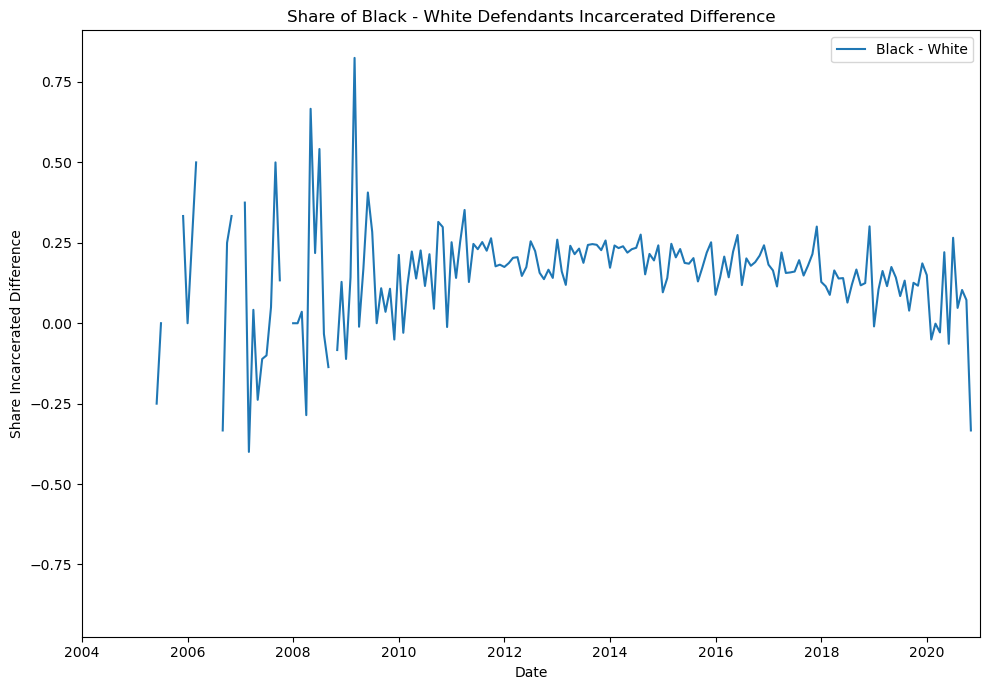

In [52]:
import matplotlib.pyplot as plt

x_dates = percent_inc.index.to_timestamp()

plt.figure(figsize=(10,7))

plt.plot(x_dates, diff_percent_inc, label="Black - White")

plt.xlim(pd.Timestamp('2004-01-01'), pd.Timestamp('2021-01-03'))

plt.xlabel("Date")
plt.ylabel("Share Incarcerated Difference")
plt.title("Share of Black - White Defendants Incarcerated Difference")
plt.legend()

plt.tight_layout()
plt.show()


Overall, Black defendants have generally had higher incarceration rates than White defendants, as shown by the positive values on the graph. Over time, the gap between Black and White incarceration rates has narrowed. In particular, starting around 2020, the difference in incarceration rates decreases notably, with several months where the rates for Black and White defendants are very similar or even slightly reversed.

## 2.3: Investigating mechanisms: incaceration rates by charge

Your colleague sees the previous graph and is worried that the gap could be different---either wider or smaller---if you adjust for the fact that prosecutors have discretion in what crimes to charge defendants with. If white defendants are charged with crimes that tend to receive probation rather than incarceration, that could explain some of the gaps.

In the next questions, you'll begin to investigate this.

### 2.3.1: Find the most common offenses (3 points)

First, create a set of 'frequent offenses' that represent (over the entire period) the union of the 10 offenses Black defendant are most likely to be charged with and the 10 offenses white defendants are most likely to be charged with (might be far less than 20 total if there's a lot of overlap in common charges)

Use the `simplified_offense_derived` for this

In [57]:
top_black = d2[d2["is_black_derived"]]["simplified_offense_derived"].value_counts().head(10)
top_white = d2[d2["is_white_derived"]]["simplified_offense_derived"].value_counts().head(10)
top_white, top_black

(simplified_offense_derived
 Narcotics                                    4923
 Retail Theft                                 2509
 DUI                                          1995
 Burglary                                     1454
 Battery                                      1448
 Driving With Suspended Or Revoked License    1160
 Theft                                        1095
 Residential Burglary                          717
 Other Offense                                 569
 UUW - Unlawful Use of Weapon                  527
 Name: count, dtype: int64,
 simplified_offense_derived
 Narcotics                                    29451
 UUW - Unlawful Use of Weapon                  9608
 Retail Theft                                  6812
 Battery                                       4650
 Driving With Suspended Or Revoked License     4459
 DUI                                           3842
 Burglary                                      3798
 Theft                                    

### 2.3.2: Look at incarceration rates (again just whether incarcerated) by race and offense type for these top offenses (3 points)

Print a wide-format version of the resulting table (so each row is an offense type, one col is black incarceration rate for that offense type; another is the white incarceration rate) and interpret. Which offenses show the largest disparities in judges being less likely to sentence White defendants to incarceration/more likely to offer those defendants probation?


In [59]:
top_black_crimes = top_black.index.tolist()
top_white_crimes = top_white.index.tolist()



black_inc_by_crime=d2[(d2['is_black_derived'] == True) & (d2['COMMITMENT_TYPE']== "Illinois Department of Corrections") & (d2["simplified_offense_derived"].isin(top_black_crimes))].groupby("simplified_offense_derived").size()
white_inc_by_crime=d2[(d2['is_white_derived'] == True) & (d2['COMMITMENT_TYPE']== "Illinois Department of Corrections") & (d2["simplified_offense_derived"].isin(top_white_crimes))].groupby("simplified_offense_derived").size()
black_by_crime=d2[(d2['is_black_derived'] == True) & (d2["simplified_offense_derived"].isin(top_black_crimes))].groupby("simplified_offense_derived").size()
white_by_crime=d2[(d2['is_white_derived'] == True) & (d2["simplified_offense_derived"].isin(top_white_crimes))].groupby("simplified_offense_derived").size()
pd1=pd.DataFrame({
    'black': black_inc_by_crime/black_by_crime
})
pd2=pd.DataFrame({
    'white': white_inc_by_crime/white_by_crime
})

percent_inc_by_crime = pd1.merge(pd2, left_index=True, right_index=True, how="outer")

percent_inc_by_crime

,black,white
simplified_offense_derived,,
Battery,0.509032,0.275552
Burglary,0.661927,0.535763
DUI,0.404997,0.341855
Driving With Suspended Or Revoked License,0.582193,0.496552
Narcotics,0.537876,0.242535
Other Offense,NaN,0.230228
Residential Burglary,NaN,0.654114
Retail Theft,0.595713,0.449582
Robbery,0.650341,NaN


### 2.3.3: Examine whether this changes pre and post change to charging threshold for retail theft (13 points)

One important question is not only whether there are disparities by offense type but also whether these disparities are changing over time.

The SAO, for instance, announced in December of 2016 that they would no longer default to charging retail thefts of under \$1,000 as felonies. This change might have (1) decreased disparities or (2) increased disparities, depending on the correlation between race/ethnicity and magnitude of goods stolen: [news coverage](https://www.dnainfo.com/chicago/20161215/little-village/kim-foxx-raises-bar-for-retail-theft-felonies/). 

Focusing on `simplified_offense_derived` == "Retail theft." Using a function and/or loop (Dec. 2016 is always excluded as a transition month):

- Compare Black-White disparities before and after the change using a two-month bandwidth (so pre is October and November 2016; post is January and February 2017)

- Compare Black-White disparities before and after the change using a four-month bandwidth (so pre is August- November 2016; post is January - April 2017)

- Compare Black-White disparities using an eight-month bandwidth

- Compare Black-White disparities using a twelve-month bandwidth


------------------ 

- Print a table with the results (any organization is fine as long as it's clear)  

- Create a bar chart where the x axis represents different bandwidths (2, 4, etc); the y axis the size of the Black-White gap in whether the defendant receives incarceration, and for each of the x axis points, you have one shaded bar representing "before" the change, another representing "after" the change (make sure that before is ordered before after and the bandwidths are from smallest to largest)

*Note*: for each of the bandwidths include dates the entire month (e.g., for the first, include not only 02-01-2017 but everything up through 02-28-2017; easiest way is for the subsetting to use the rounded `sentenceym_derived`). Also make sure to only include white or black defendants.


**Extra credit**: because the bandwidths have different sample sizes, a better viz incorporates measures of uncertainty. Add standard errors to the estimates using the formula: $(\dfrac{p(1-p)}{n})^{0.5}$ where $p$ is the gap and $N$ is the number of cases in each bandwidth period 


In [61]:
def date_bandwith (start, end):
    
    mask_date = (pd.Timestamp(start) <= pd.to_datetime(d2["sentenceym_derived"])) & (pd.to_datetime(d2["sentenceym_derived"]) <= pd.Timestamp(end))
    
    black_inc_by_crime = d2[mask_date & (d2['is_black_derived'] == True) & (d2['COMMITMENT_TYPE']== "Illinois Department of Corrections") & (d2["simplified_offense_derived"] == "Retail Theft")].shape[0]
    white_inc_by_crime = d2[mask_date & (d2['is_white_derived'] == True) & (d2['COMMITMENT_TYPE']== "Illinois Department of Corrections") & (d2["simplified_offense_derived"] == "Retail Theft")].shape[0]
    black_by_crime = d2[mask_date & (d2['is_black_derived'] == True) & (d2["simplified_offense_derived"] == "Retail Theft")].shape[0]
    white_by_crime = d2[mask_date & (d2['is_white_derived'] == True) & (d2["simplified_offense_derived"] == "Retail Theft")].shape[0]
   
    black_rate = black_inc_by_crime / black_by_crime if black_by_crime > 0 else 0
    white_rate = white_inc_by_crime / white_by_crime if white_by_crime > 0 else 0
    
   
    date_by_crime = pd.DataFrame({
        'black': [black_rate],
        'white': [white_rate]
    })

    #standard error calculation section
    p = black_rate - white_rate
    n = black_by_crime + white_by_crime
    
    if n > 0 and 0 < p < 1:
        standard_error = ((p * (1 - p)) / n) ** 0.5
    else:
        standard_error = 0

    return date_by_crime,standard_error

In [62]:
pre_two_months = date_bandwith("10-1-2016","11-30-2016")
post_two_months = date_bandwith("1-1-2017","2-28-2017")
two_months = pd.merge(pre_two_months[0], post_two_months[0],how="outer")
two_months.index = ["Pre-Policy-2", "Post-Policy-2"]


pre_four_months = date_bandwith("08-1-2016","11-30-2016")
post_four_months = date_bandwith("1-1-2017","4-30-2017")
four_months = pd.merge(pre_four_months[0], post_four_months[0],how="outer")
four_months.index = ["Pre-Policy-4", "Post-Policy-4"]


pre_eight_months = date_bandwith("04-1-2016","11-30-2016")
post_eight_months = date_bandwith("1-1-2017","8-31-2017")
eight_months = pd.merge(pre_eight_months[0], post_eight_months[0],how="outer")
eight_months.index = ["Pre-Policy-8", "Post-Policy-8"]


pre_twelve_months = date_bandwith("12-1-2015","11-30-2016")
post_twelve_months = date_bandwith("1-1-2017","1-1-2018")
twelve_months = pd.merge(pre_twelve_months[0], post_twelve_months[0],how="outer")
twelve_months.index = ["Pre-Policy-12", "Post-Policy-12"]

total = pd.concat([
    two_months,
    four_months,
    eight_months,
    twelve_months
], axis=0)

yerr = [pre_two_months[1],post_two_months[1],
        pre_four_months[1], post_four_months[1],
        pre_eight_months[1],post_eight_months[1],
        pre_twelve_months[1],post_twelve_months[1],]


total.columns = ['Black Incarceration Rate', 'White Incarceration Rate']
total

,Black Incarceration Rate,White Incarceration Rate
Pre-Policy-2,0.372340,0.217391
Post-Policy-2,0.626374,0.538462
Pre-Policy-4,0.411972,0.330357
Post-Policy-4,0.558511,0.476923
Pre-Policy-8,0.493450,0.450000
Post-Policy-8,0.568990,0.436090
Pre-Policy-12,0.510274,0.441964
Post-Policy-12,0.580889,0.419271


<Axes: >

Text(0.5, 1.0, 'Standard Banding Incarceration Rates')

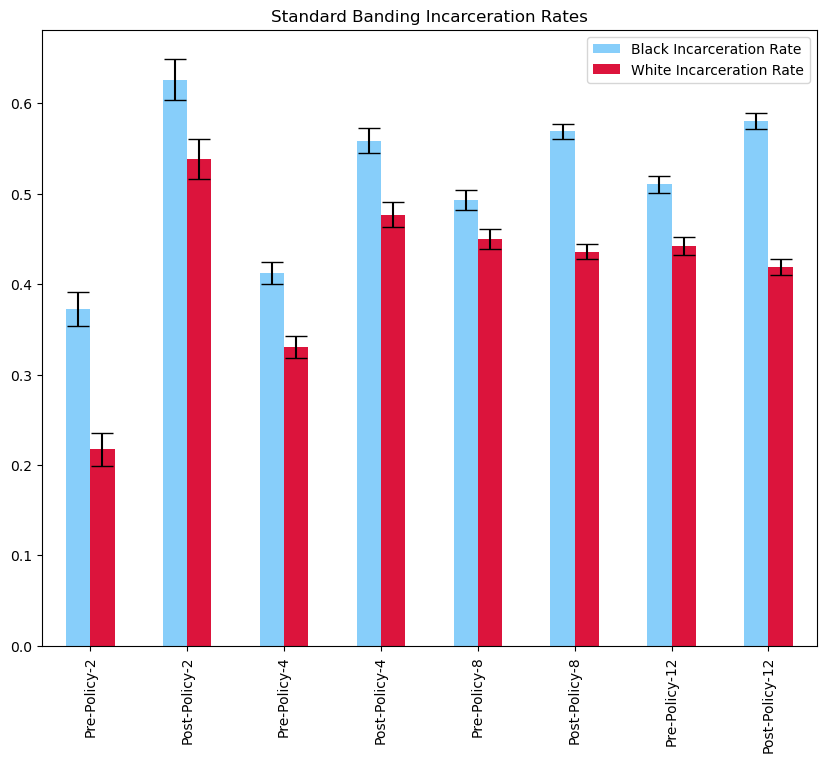

In [92]:
total.plot.bar(color=["lightskyblue","crimson"],figsize=(10,8), yerr = yerr, capsize=8)
plt.title("Standard Banding Incarceration Rates")

<Axes: >

Text(0.5, 1.0, 'Standard Banding Incarceration Rates - Banding Order')

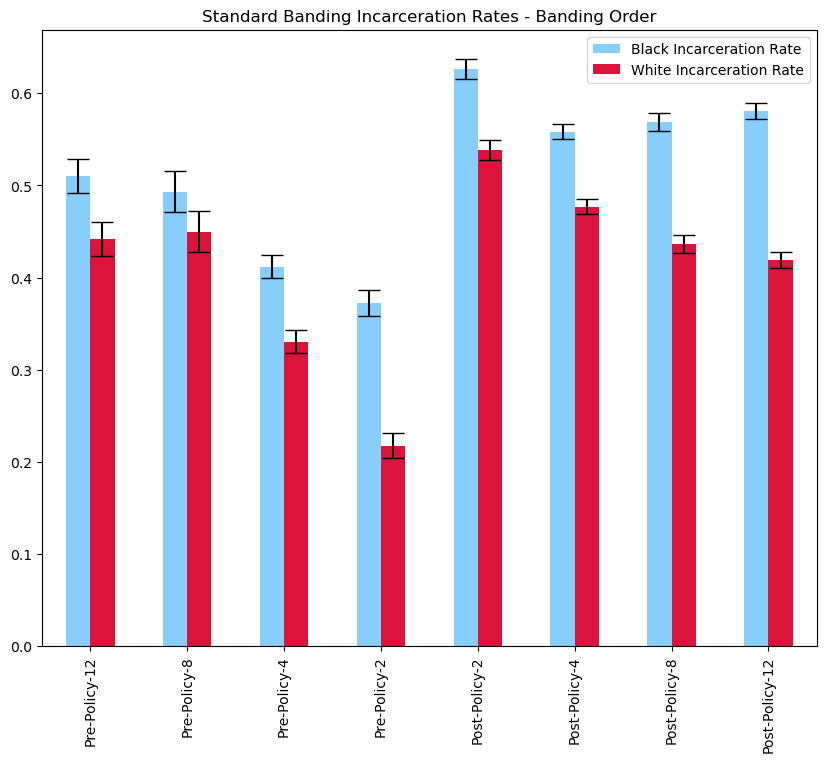

In [98]:
new_order = [ 'Pre-Policy-12','Pre-Policy-8','Pre-Policy-4', 'Pre-Policy-2','Post-Policy-2',  'Post-Policy-4',  
             'Post-Policy-8',  'Post-Policy-12',]
reordered_total = total.reindex(new_order)
reordered_total.plot.bar(color=["lightskyblue","crimson"],figsize=(10,8), yerr = yerr, capsize=8)
plt.title("Standard Banding Incarceration Rates - Banding Order")

### 2.3.3.1: Interpret the results (2 points)

Write a two-sentence interpretation of the results. What might this show about how people on both sides of the issue---those who argued that the retail theft policy change would narrow disparities; those who argued that the change may widen disparities--could support their claims? 